In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing 
%matplotlib inline


In [2]:
df = pd.read_csv("TehranHousePrice.csv")

# take a look at the dataset
df.head(665)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
660,86,2,True,True,True,Komeil,1978000000,65933.33
661,95,2,True,True,True,Punak,4200000000,140000.00
662,85,2,True,True,True,NaN,1955000000,65166.67
663,88,2,True,True,True,Valiasr,2024000000,67466.67


In [3]:
df['Address'].replace('', np.nan, inplace=True)
df.dropna(subset=['Address'], inplace=True)
df.head(664)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
660,86,2,True,True,True,Komeil,1978000000,65933.33
661,95,2,True,True,True,Punak,4200000000,140000.00
663,88,2,True,True,True,Valiasr,2024000000,67466.67
664,93,2,True,True,True,Amir Bahador,2139000000,71300.00


In [4]:
df['Area'] = df['Area'].str.replace(',', '')
df['Area'] = df['Area'].astype(float)

df = df[df['Area'] < 1000]



In [5]:
df.head(709)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1850000000,61666.67
1,60.0,1,True,True,True,Shahran,1850000000,61666.67
2,79.0,2,True,True,True,Pardis,550000000,18333.33
3,95.0,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
708,151.0,3,True,True,True,Shahrake Qods,1510000000,50333.33
710,86.0,2,True,True,True,Pardis,500000000,16666.67
711,85.0,2,True,True,True,Pardis,600000000,20000.00
712,86.0,2,True,True,True,Pardis,750000000,25000.00


In [6]:
from sklearn.preprocessing import LabelEncoder
encode_address = LabelEncoder()
df['Address'] = encode_address.fit_transform(df['Address'])

encode_parking = LabelEncoder()
df.Parking = encode_parking.fit_transform(df.Parking)

encode_elevator = LabelEncoder()
df.Elevator = encode_elevator.fit_transform(df.Elevator)

df.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,True,1,156,1850000000,61666.67
1,60.0,1,1,True,1,156,1850000000,61666.67
2,79.0,2,1,True,1,117,550000000,18333.33
3,95.0,2,1,True,1,152,902500000,30083.33
4,123.0,2,1,True,1,150,7000000000,233333.33
5,70.0,2,1,True,0,106,2050000000,68333.33
6,87.0,2,1,True,1,117,600000000,20000.00
7,59.0,1,1,True,1,156,2150000000,71666.67
8,54.0,2,1,True,0,13,493000000,16433.33
9,71.0,1,1,True,1,183,2370000000,79000.00


In [7]:
cdf = df[['Area', 'Parking', 'Elevator', 'Address', 'Price']]

cdf.head(664)

,Area,Parking,Elevator,Address,Price
0,63.0,1,1,156,1850000000
1,60.0,1,1,156,1850000000
2,79.0,1,1,117,550000000
3,95.0,1,1,152,902500000
4,123.0,1,1,150,7000000000
...,...,...,...,...,...
661,95.0,1,1,122,4200000000
663,88.0,1,1,176,2024000000
664,93.0,1,1,10,2139000000
665,70.0,1,1,12,1630000000


In [8]:
# normalized_cdf=(cdf-cdf.mean())/cdf.std()
# normalized_cdf
# x_data = price_data/max(price_data)
# x_data
# y_data = address_data/max(address_data)
# y_data

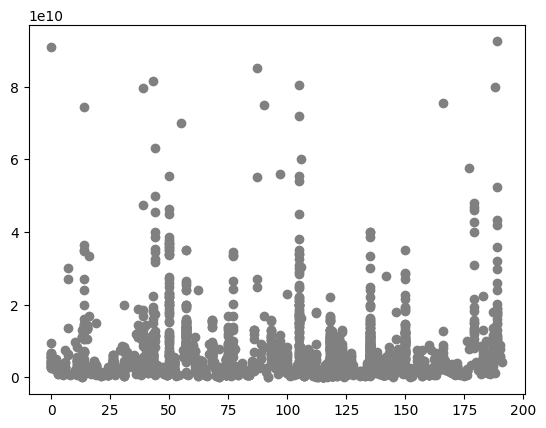

In [9]:
x_data= cdf[['Area', 'Parking', 'Elevator', 'Address', 'Price']].values

# print(x_data)
y_data = cdf[['Price']].values
# print(y_data)
x_normal= preprocessing.StandardScaler().fit(x_data).transform(x_data.astype(float))
# print(x_normal)
y_normal = preprocessing.StandardScaler().fit(y_data).transform(y_data.astype(float))
# print(y_normal)


# print(x_normal.shape)
# print(y_normal.shape)

x_address = pd.DataFrame(x_normal)
# print(x_address)
y_price = pd.DataFrame(y_normal)
# print(y_price)
#
# plt.scatter(x_address[3], y_price[0], color = 'grey')

plt.scatter(cdf.Address, cdf.Price, color = 'grey')

plt.xlabel = ('Address')
plt.ylabel = ('Price')
plt.show()




In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ENGINESIZE'